# Part 1: Setting Up

In [45]:
# Importing the neccessary libraries
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import gdown

In [46]:
# Define file IDs and corresponding filenames
file_ids = [
    "1m99RBSAG4zIPOJ2nfRupHj-jZDteTr6G",
    "1p-bKN89n-r-HnDGRmVF2tDpvHA5DUv0w",
    "1XDBeNesyWO9YKVxh5fGtzQM4V-YXL_ZJ",
    "1hakH4A1exZu58b8AEakkJFNktCGjMoAH",
    "1Tf03LIjkD3GsLHO_meTUocIhdZ-uZHbM",
    "1eInNXFn5ibTRT6R5P5ntn5jw8G-sWoPA",
    "1YZymTI35b22W8Z_X371xAIYUWz7SztLW"
]
filenames = [
    "assessments.csv",
    "courses.csv",
    "studentAssessment.csv",
    "studentInfo.csv",
    "studentRegistration.csv",
    "studentVle.csv",
    "vle.csv"
]

# Check for missing files and download if necessary
for file_id, filename in zip(file_ids, filenames):
    if not os.path.exists(filename):
        print(f"{filename} not found. Downloading...")
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, filename, quiet=False)
        print(f"Downloaded: {filename}")
    else:
        print(f"{filename} already exists. Skipping download.")

assessments.csv already exists. Skipping download.
courses.csv already exists. Skipping download.
studentAssessment.csv already exists. Skipping download.
studentInfo.csv already exists. Skipping download.
studentRegistration.csv already exists. Skipping download.
studentVle.csv already exists. Skipping download.
vle.csv already exists. Skipping download.


In [47]:
# Load data into DataFrames
df_assessments = pd.read_csv("assessments.csv")
df_courses = pd.read_csv("courses.csv")
df_studentAssessment = pd.read_csv("studentAssessment.csv")
df_studentInfo = pd.read_csv("studentInfo.csv")
df_studentRegistration = pd.read_csv("studentRegistration.csv")
df_studentVle = pd.read_csv("studentVle.csv")
df_vle = pd.read_csv("vle.csv")

# Part 2: Understanding the Data
In this section, we are trying to understand the OULAD Dataset through Exploratory Data Analysis (EDA). This is the process of analyzing and summarizing datasets using statistical and visualization techniques to uncover patterns, trends, relationships, and anomalies. The team will be analyzing each individual file first.

### 1) Assessments.csv

In [48]:
#ّFirst file
df_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


The **Assessment.csv** file contains information about assessments in module presentations. Typically, each presentation consists of multiple assessments, followed by a **final exam**.

**Headers in the Dataset:**

- **`code_module`**: Identification code of the module to which the assessment belongs. ['AAA', 'BBB', ..., 'GGG']

- **`code_presentation`**: Identification code of the presentation to which the assessment belongs. Different presentations indicated with letters "B" and "J" after year for semester 2 and semester 1 respectively.

- **`id_assessment`**: Unique identification number of the assessment.

- **`assessment_type`**: Type of assessment, which can be one of the following:
  - **TMA** – Tutor Marked Assessment  

  - **CMA** – Computer Marked Assessment  

  - **Exam** – Final Examination  
- **`date`**: The final submission date of the assessment, represented as the number of days since the start of the module presentation. The start date is assigned the value **0**.
- **`weight`**: The weight of the assessment in **percentage (%)**. Typically:
  - **Final Exams** have a weight of **100%**.
  - The sum of all other assessments equals **100%**.

In [49]:
# Count the number of NULL values in each column
print("Count the number of NULL values for each column:")
print(df_assessments.isna().sum())

Count the number of NULL values for each column:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [50]:
# Display the rows with NULL values
df_assessments[df_assessments.isnull().any(axis=1)]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


When the team checked for **NULL** values and investigated why there were **11 NULL rows**, they found that all of them had an **`assessment_type`** of **Exam**.  

This is expected because the **`date`** field is used to indicate the submission deadline for assessments. Since exams do not have submission deadlines like other assessments (**TMA** and **CMA**), the **`date`** field is left **NULL** for them.

### 2) Courses.csv

In [51]:
#ّSecond file
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [52]:
# Count the number of NULL values in each column
print('Count the number of NULL values for each column:')
df_courses.isna().sum()

Count the number of NULL values for each column:


code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

The **`Courses.csv`** file contains a list of **all** available modules (courses) and their corresponding presentations.  

**Included Fields:**
- **`code_module`** – Identification code for the module.  

- **`code_presentation`** – Identification code for the module presentation.  

- **`module_presentation_length`** – Duration of the module presentation (in days).  

The dataset is clean and does not require additional preprocessing.

### 3) studentAssessment.csv

In [53]:
#ّThird file
df_studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


The **`studentAssessment`** file contains the results of students’ assessments. If a student does not submit an assessment, no result is recorded. Additionally, final exam submissions may be missing if the results of assessments are not stored in the system.  

**Included Fields:**
- **`id_assessment`** – Unique identification number for the assessment.  

- **`id_student`** – Unique identification number for the student.  
- **`date_submitted`** – The submission date of the assessment, measured as the number of days since the start of the module presentation.  
  - **Negative values indicate that the student submitted the assessment before the official start of the module presentation.**  
- **`is_banked`** – A status flag indicating whether the assessment result has been transferred from a previous module presentation.  
- **`score`** – The student’s score for the assessment, ranging from **0 to 100**.  
  - A **score below 40** is interpreted as a **Fail**. 

In [54]:
# Count the number of NULL values in each column
print('Count the number of NULL values for each column:')
df_studentAssessment.isna().sum()

Count the number of NULL values for each column:


id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [55]:
# Display the rows with NULL values
df_studentAssessment[df_studentAssessment.isnull().any(axis=1)]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


After an initial analysis, the team found **173 missing values** in the `score` column. These blanks can be attributed to two main reasons:

1. The student did not submit the assessment, resulting in no recorded score (which should logically be **0**).  

2. The student submitted the assessment, but the result was not stored in the system.

To gain deeper insights, the team decided to merge the `studentInfo` and `assessments` datasets for further analysis.

In [56]:
# Step 1: Merge studentAssessment and studentInfo on 'id_student'
df_studentAssessmentAndstudentInfo = pd.merge(df_studentAssessment, df_studentInfo, on='id_student', how='inner')

# Step 2: Merge the previous merge result with assessments on 'id_assessment'
df_merged = pd.merge(df_studentAssessmentAndstudentInfo, df_assessments, on='id_assessment', how='inner')

# Filter rows where any value in df_studentAssessment columns is NULL
missing_assessment_rows = df_merged[df_merged[df_studentAssessment.columns].isna().any(axis=1)]

missing_assessment_rows.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module_x,code_presentation_x,gender,region,highest_education,...,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code_module_y,code_presentation_y,assessment_type,date,weight
237,1752,721259,22,0,NaN,AAA,2013J,F,South Region,Lower Than A Level,...,55<=,0,120,N,Withdrawn,AAA,2013J,TMA,19.0,10.0
238,1752,721259,22,0,NaN,AAA,2014J,F,South Region,Lower Than A Level,...,55<=,1,60,N,Withdrawn,AAA,2013J,TMA,19.0,10.0
996,1754,260355,127,0,NaN,AAA,2013J,F,London Region,A Level or Equivalent,...,35-55,0,60,N,Withdrawn,AAA,2013J,TMA,117.0,20.0
997,1754,260355,127,0,NaN,AAA,2014J,F,London Region,A Level or Equivalent,...,35-55,1,120,N,Withdrawn,AAA,2013J,TMA,117.0,20.0
2508,1760,2606802,180,0,NaN,AAA,2014J,M,North Region,A Level or Equivalent,...,0-35,0,60,N,Fail,AAA,2014J,TMA,117.0,20.0


In [57]:
# Count occurrences of each category in the 'final_result' column
final_result_counts = missing_assessment_rows['final_result'].value_counts()

final_result_counts

final_result
Withdrawn      104
Fail            82
Pass            40
Distinction      1
Name: count, dtype: int64

At a glance, the team observed that most of the blank scores belong to students who have either **Failed** or **Withdrawn** from the course. However, **41 students** still have a `NULL` score, requiring further investigation.

In [58]:
# Filter rows where 'final_result' is either 'Pass' or 'Distinction'
pass_distinction_df = missing_assessment_rows[missing_assessment_rows['final_result'].isin(['Pass', 'Distinction'])]

# Select Columns to focus on
selected_columns = ['id_assessment', 'id_student','code_presentation_x', 'date_submitted', 'num_of_prev_attempts', 'studied_credits','score','assessment_type','final_result','weight']

# Display the filtered DataFrame
pass_distinction_df[selected_columns]

,id_assessment,id_student,code_presentation_x,date_submitted,num_of_prev_attempts,studied_credits,score,assessment_type,final_result,weight
9272,14989,502717,2013B,216,1,240,NaN,TMA,Pass,18.0
9310,14989,515497,2013B,219,0,120,NaN,TMA,Pass,18.0
17352,14997,501208,2013J,-1,1,60,NaN,TMA,Pass,18.0
19370,14998,342685,2013J,132,0,60,NaN,TMA,Pass,18.0
20478,14999,583473,2013J,220,0,120,NaN,TMA,Pass,18.0
21339,15000,476278,2013J,173,0,60,NaN,TMA,Pass,18.0
22942,15001,352688,2013J,209,0,210,NaN,TMA,Pass,18.0
33920,15011,291844,2014B,152,0,120,NaN,TMA,Pass,18.0
34445,15012,588039,2014B,175,0,120,NaN,TMA,Pass,18.0
35047,15013,190565,2014B,206,0,60,NaN,TMA,Pass,18.0


Upon further investigation, the team concluded that the **41 missing scores** belong to the **TMA assessment type**. However, it remains unclear whether these missing values are due to **students not submitting their assessments** or a **system error** in recording them.  

To address this, the team will acknowledge the missing values and replace them with the **mean score** during the training phase.

Mean: 75.7995729226023
Median: 80.0
Mode: 100.0


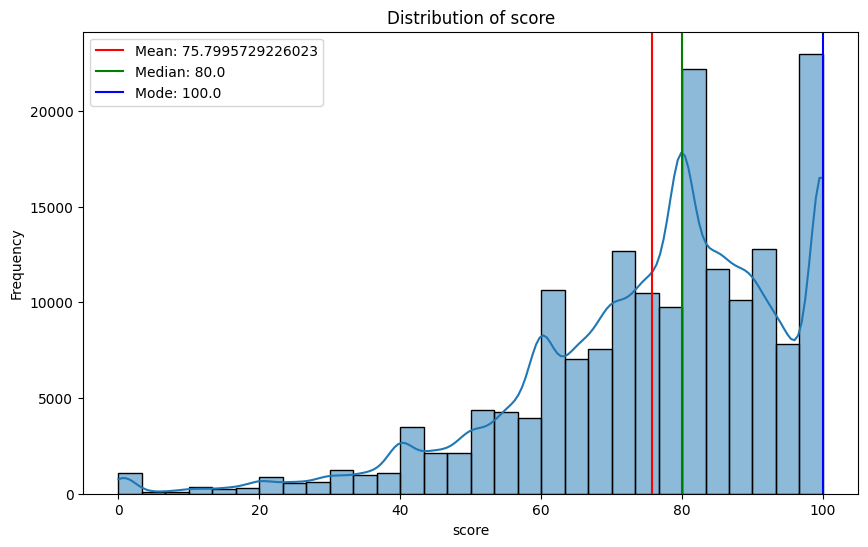

In [59]:
#Specify the column of interest
column = "score"

# Drop NaN values from the 'score' column
df_studentAssessment = df_studentAssessment.dropna(subset=[column])

# Calculate statistics
mean_score = df_studentAssessment[column].mean()
median_score = df_studentAssessment[column].median()
mode_score = df_studentAssessment[column].mode().iloc[0]
#mode_score = mode_result.mode[0] if mode_result.mode.size > 0 else np.nan

# Print statistics
print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Mode: {mode_score}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_studentAssessment[column], kde=True, bins=30)
plt.title(f'Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.axvline(mean_score, color='r', linestyle='-', label=f'Mean: {mean_score}')
plt.axvline(median_score, color='g', linestyle='-', label=f'Median: {median_score}')
plt.axvline(mode_score, color='b', linestyle='-', label=f'Mode: {mode_score}')
plt.legend()
plt.show()

The histogram illustrates the distribution of scores in the dataset. The **mean score** is approximately **75.80**, represented by the **red dashed line**, while the **median score** is **80.0**, shown by the **green dashed line**. The **mode** of the scores is **100.0**, indicated by the **blue dashed line**.  

The distribution is **right-skewed**, with a noticeable peak around **80** and a significant number of scores at **100**. This suggests that while many students achieved high scores, there is also a broad range of lower scores present.

### 4) studentInfo.csv

In [60]:
#ّFourth file
df_studentInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


The **studentInfo.csv** file contains demographic information about students along with their academic results.

**Included Fields:**
- **`code_module`** – Identification code for the module.  

- **`code_presentation`** – Identification code for the presentation of the module.  
- **`id_student`** – Unique identification number assigned to each student.  
- **`gender`** – The student’s gender.  
- **`region`** – The geographic region where the student lived while taking the module presentation.  
- **`highest_education`** – The highest level of education attained by the student before enrolling in the module.  
- **`imd_band`** – The **Index of Multiple Deprivation (IMD) band**, indicating the socio-economic status of the student's residential area.  
- **`age_band`** – The student’s age group category.  
- **`num_of_prev_attempts`** – The number of times the student has previously attempted this module.  
- **`studied_credits`** – The total number of credits the student is currently enrolled in.  
- **`disability`** – Indicates whether the student has declared a disability (`Yes` or `No`).  
- **`final_result`** – The student’s final outcome in the module presentation (`Pass`, `Fail`, `Distinction`, or `Withdrawn`).  


In [61]:
# Count the number of NULL values in each column
print('Count the number of NULL values for each column:')
df_studentInfo.isna().sum()

Count the number of NULL values for each column:


code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

From the **studentInfo** dataset, the team identified **1,111 missing values** in the `imd_band` column. This could be due to the time period in which the student enrolled, during which the system may not have recorded the student's `imd_band`.

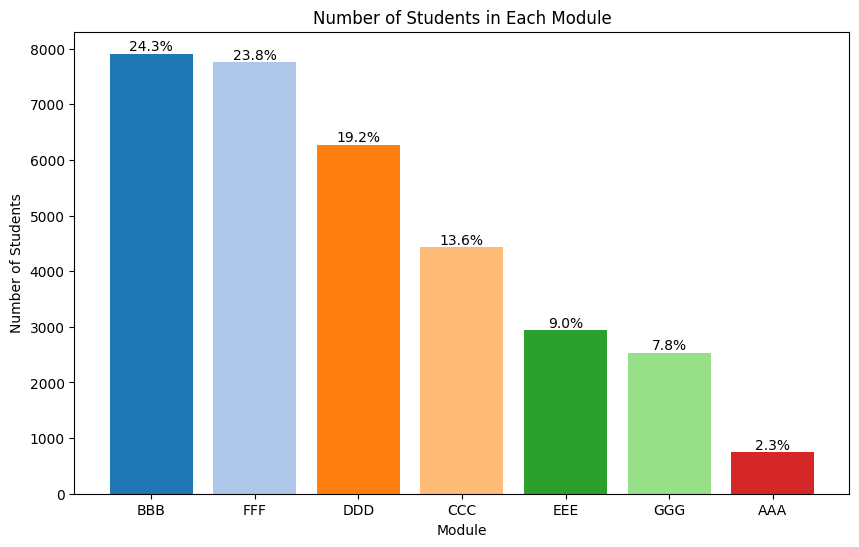

In [62]:
# Count the number of students in each module
module_counts = df_studentInfo['code_module'].value_counts()

# Calculate the percentage of students in each module
module_percentages = (module_counts / module_counts.sum()) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(module_counts.index, module_counts, color=plt.cm.tab20.colors[:len(module_counts)])

# Add percentage labels above the bars
for bar, percentage in zip(bars, module_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Add titles and labels
plt.title('Number of Students in Each Module')
plt.xlabel('Module')
plt.ylabel('Number of Students')
plt.show()

This bar plot displays the number of students enrolled in each module, along with the percentage of the total student population represented by each module. The plot provides a clear visual comparison of student distribution across different modules. Each bar's height corresponds to the number of students, and the labels above the bars indicate the percentage of the total enrollment for each module. This helps in identifying which modules are more popular among students and can guide resource allocation and curriculum planning.

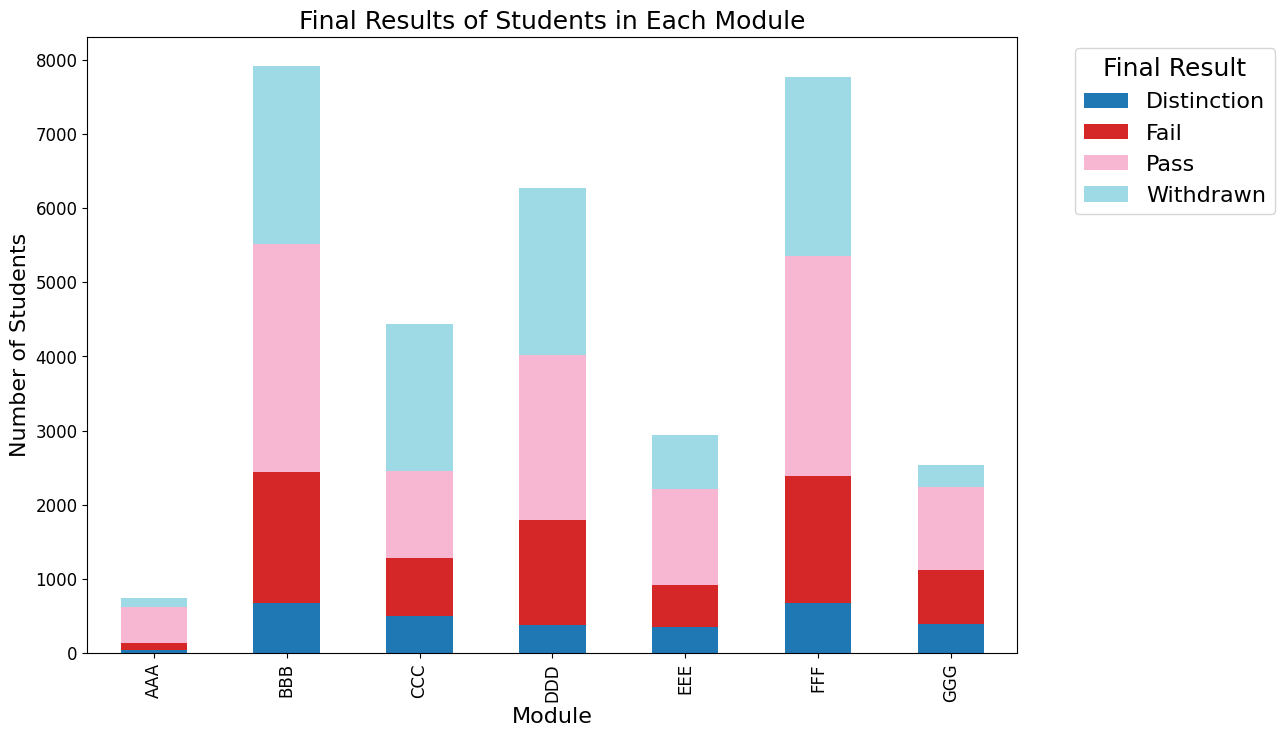

In [63]:
# Count the number of students in each module with each final result
module_final_result_counts = df_studentInfo.groupby(['code_module', 'final_result']).size().unstack(fill_value=0)

# Calculate the percentage of each final result within each module
module_final_result_percentages = module_final_result_counts.div(module_final_result_counts.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
module_final_result_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels with larger font sizes
plt.title('Final Results of Students in Each Module', fontsize=18)
plt.xlabel('Module', fontsize=16)
plt.ylabel('Number of Students', fontsize=16)

# Increase the font size for the legend
plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize=18)

# Increase the font size for the tick labels on the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


The stacked bar plot shows the distribution of final results of students across different modules. Each bar represents a module, and the segments within each bar represent the number of students achieving each final result, such as 'Pass', 'Fail', 'Withdrawn', etc. The color-coded segments allow you to compare the proportion of different final results within each module. This visualization helps identify which modules have higher or lower pass rates, as well as the prevalence of other outcomes like failures or withdrawals. This information can be valuable for understanding the performance trends in each module and identifying areas that might need improvement or further investigation.

In [64]:
df = df_studentInfo.groupby(['code_module', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="code_module",
            hover_data=None, barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Pass and Fail Percentages by Module',
    xaxis_title="Result",
    yaxis_title="Percentage [%]",
    legend_title="Code Module",
    width=700,
    height=500,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)
fig

### 5) studentRegistration.csv

In [65]:
#ّFifth file
df_studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


The **studentRegistration.csv** file contains information about when a student registered for a module presentation. If a student later unregistered, the **deregistration date** is also recorded.

**Included Fields:**
- **`code_module`** – Identification code for the module.  

- **`code_presentation`** – Identification code for the module presentation.  
- **`id_student`** – Unique identification number assigned to each student.  
- **`date_registration`** – The date when the student registered for the module presentation.  
  - Measured in **days relative to the start of the module presentation**.  

  - Example: A value of **`-30`** means the student registered **30 days before** the module presentation began.  
- **`date_unregistration`** – The date when the student unregistered from the module presentation.  
  - Measured in **days relative to the start of the module presentation**.  

  - Students who **completed the course** have this field **empty**.  
  - Students who **unregistered** have **"Withdrawal"** as their **`final_result`** in the **studentInfo.csv** file.  

In [66]:
# Count the number of NULL values in each column
print('Count the number of NULL values for each column:')
df_studentRegistration.isna().sum()

Count the number of NULL values for each column:


code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

There are **45 NULL entries** in the `date_registration` column of the **studentRegistration** dataset. This indicates that **45 students failed to register for the module on time**.

Additionally, there are **22,521 NULL entries** in `date_unregistration`, meaning that these students **did not drop out** of the module.


### 6) studentVle.csv

In [67]:
#ّSixth file
df_studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


The **studentVle.csv** file contains information about each student's interactions with materials in the **Virtual Learning Environment (VLE).**

**Included Fields:**
- **`code_module`** – Identification code for the module.  

- **`code_presentation`** – Identification code for the module presentation.  
- **`id_student`** – Unique identification number assigned to each student.  
- **`id_site`** – A unique identification number for the VLE material.  
- **`date`** – The date of the student's interaction with the material, measured as the number of days since the start of the module presentation.  
- **`sum_click`** – The number of times a student interacted with the material on a given day.  

In [68]:
# Count the number of NULL values in each column
print('Count the number of NULL values for each column:')
df_studentVle.isna().sum()

Count the number of NULL values for each column:


code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

### 7) vle.csv

In [69]:
#ّLast file
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


The **vle.csv** file contains information about the available materials in the **VLE.** These materials typically include **HTML pages, PDF files, videos, and other digital resources.** Students can access these materials online, and their interactions with them are recorded.

**Included Fields:**
- **`id_site`** – Unique identification number for the VLE material.  

- **`code_module`** – Identification code for the module.  
- **`code_presentation`** – Identification code for the module presentation.  
- **`activity_type`** – The category or role of the material within the module (e.g., lecture notes, assignments, videos).  
- **`week_from`** – The week when the material becomes available for students.  
- **`week_to`** – The final week during which the material is intended to be used.  


In [70]:
# Count the number of NULL values in each column
print('Count the number of NULL values for each column:')
df_vle.isna().sum()

Count the number of NULL values for each column:


id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

From the **VLE dataset**, the **5,243 empty rows** in the `week_from` and `week_to` columns indicate that these resources do not have a specified time frame for availability online.

In [71]:
# Filter the DataFrame to include only rows where 'code_module' is 'BBB'
df_studentInfo_FFF = df_studentInfo[df_studentInfo['code_module'] == 'FFF'].copy()

# Verify by displaying the info
df_studentInfo_FFF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7762 entries, 22297 to 30058
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           7762 non-null   object
 1   code_presentation     7762 non-null   object
 2   id_student            7762 non-null   int64 
 3   gender                7762 non-null   object
 4   region                7762 non-null   object
 5   highest_education     7762 non-null   object
 6   imd_band              7395 non-null   object
 7   age_band              7762 non-null   object
 8   num_of_prev_attempts  7762 non-null   int64 
 9   studied_credits       7762 non-null   int64 
 10  disability            7762 non-null   object
 11  final_result          7762 non-null   object
dtypes: int64(3), object(9)
memory usage: 788.3+ KB


In [72]:
# Calculate gender distribution
genero = df_studentInfo_FFF[['id_student', 'gender']].drop_duplicates().groupby('gender').agg({'id_student':'count'}).reset_index()

# Calculate percentage
genero['Percentage'] = genero.apply(lambda x: round(100 * (x['id_student'] / genero['id_student'].sum()), 2), axis=1)

# Create bar plot
fig = px.bar(genero, x='gender', y='id_student',
              text='id_student', color='gender', hover_data=['id_student'],
              template="seaborn")

# Update layout
fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title='Distribution Of Gender for Course FFF',
    xaxis_title="Gender",
    yaxis_title="Number Of Students",
    legend_title="Gender",
    width=600,
    height=400,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)

# Show plot
fig.show()

In [73]:
df = df_studentInfo_FFF.groupby(['gender', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="gender",
            hover_data=['Percentage'], barmode = 'stack', template="seaborn")

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Gender (FFF)',
    xaxis_title="Final Result",
    yaxis_title="Percentage [%]",
    legend_title="Gender",
    width=600,
    height=400,
    uniformtext_minsize=10,
    uniformtext_mode='hide',
)
fig.show()

In [74]:
df = df_studentInfo_FFF.groupby(['region', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="region",
            hover_data=['Percentage'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Region (FFF)',
    xaxis_title="Result",
    yaxis_title="Percentage [%]",
    legend_title="Region",
    width=800,
    height=700,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)

fig.show()

The chart compares the percentage of final results across ten different regions. Each region’s bar is divided into three sections representing different outcomes: Fail, Pass, and Distinction. Here are the key observations:

* East Midlands Region: Approximately 10% of students in this region received a Fail grade, 60% passed, and 30% achieved Distinction.
* London Region: London had 5.47% Fail, 6.37% Pass, and 5.46% Distinction.
* North Region: This area had 8.79% Fail, 7.57% Pass, and 7.68% Distinction.
* Scotland: Scotland’s performance was 6.19% Fail, 7.46% Pass, and 7.12% Distinction.
* South East Region: Students here achieved 5.16% Fail, 5.39% Pass, and 5.61% Distinction.
* South West Region: The percentages were 5.66% Fail, 5.85% Pass, and 5.59% Distinction.
* Yorkshire Region: Yorkshire had 6.53% Fail, 6.55% Pass, and 6.55% Distinction.

This visualization provides an easy comparison of performance outcomes across regions.

In [75]:
df = df_studentInfo_FFF.groupby(['highest_education', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] == x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text='Percentage', color="highest_education",
            hover_data=['Percentage'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Highest Education (FFF)',
    xaxis_title="Final Result",
    yaxis_title="Quantidade [Alunos]",
    legend_title="Highest Education",
    width=800,
    height=700,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
)

fig.show()

In [76]:
df = df_studentInfo_FFF.groupby(['age_band', 'final_result']).agg({'id_student':'count'}).reset_index()

df['Percentage'] = df.apply(lambda x:  round(100 * (x['id_student'] / df[df['final_result'] ==\
     x['final_result']]['id_student'].sum()),2), axis=1)

fig = px.bar(df, x="final_result", y="Percentage", text="Percentage", color="age_band",
            hover_data=['Percentage'], barmode = 'stack', template='seaborn')

fig.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Final Result By Age (FFF)',
    xaxis_title="Final Result",
    yaxis_title="Percentage [%]",
    legend_title="Age",
    width=800,
    height=700,
    uniformtext_minsize=9,
    uniformtext_mode='hide',
)

fig.show()

In [77]:
df_studentInfo_FFF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7762 entries, 22297 to 30058
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           7762 non-null   object
 1   code_presentation     7762 non-null   object
 2   id_student            7762 non-null   int64 
 3   gender                7762 non-null   object
 4   region                7762 non-null   object
 5   highest_education     7762 non-null   object
 6   imd_band              7395 non-null   object
 7   age_band              7762 non-null   object
 8   num_of_prev_attempts  7762 non-null   int64 
 9   studied_credits       7762 non-null   int64 
 10  disability            7762 non-null   object
 11  final_result          7762 non-null   object
dtypes: int64(3), object(9)
memory usage: 788.3+ KB


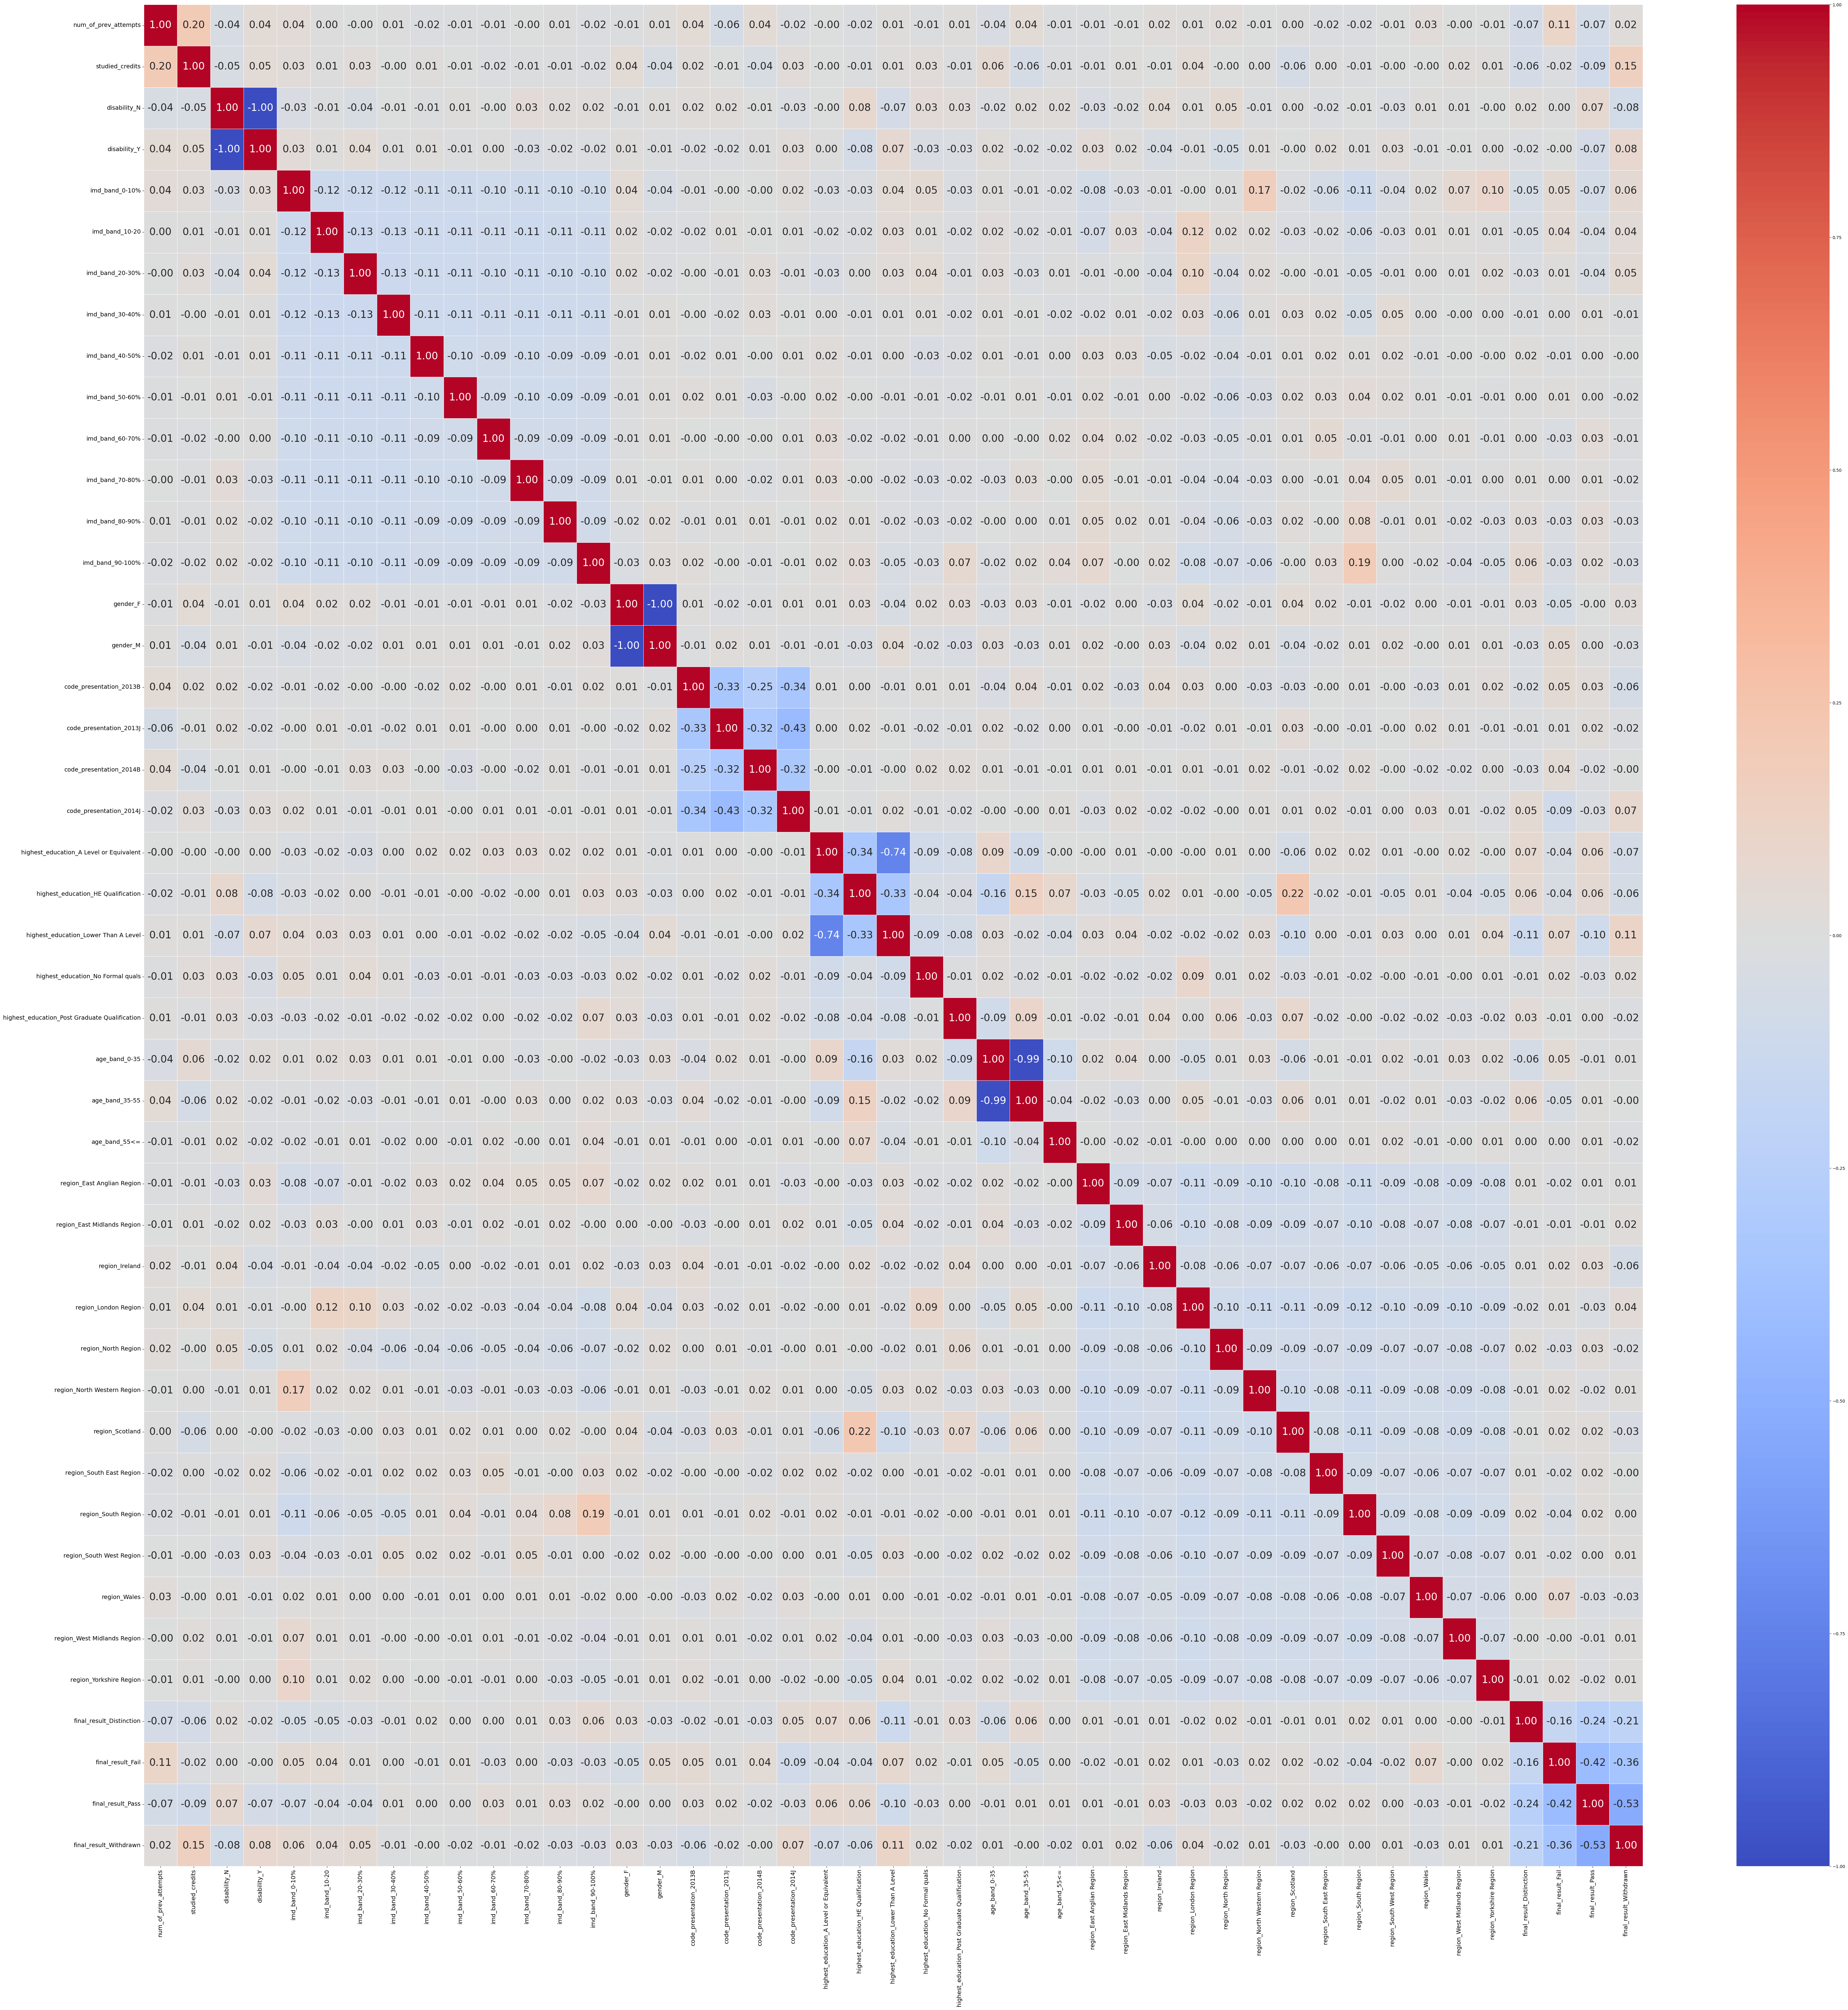

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select only the relevant columns (excluding id_student)
df_selected = df_studentInfo_FFF[['disability','imd_band','gender','code_presentation','highest_education','age_band','region','final_result', 'num_of_prev_attempts', 'studied_credits']]

# First, encode categorical columns
df_encoded = pd.get_dummies(df_selected)

# Calculate the correlation matrix for all columns
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(80, 80))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"size": 24},
            fmt=".2f")

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.show()

Missing values in Studied Credits: 0
count    22437.000000
mean        74.475643
std         36.811006
min         30.000000
25%         60.000000
50%         60.000000
75%         90.000000
max        630.000000
Name: studied_credits, dtype: float64


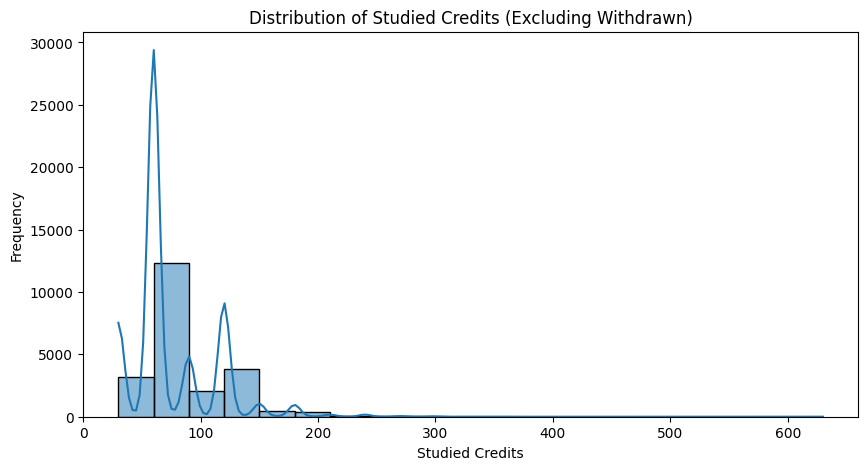

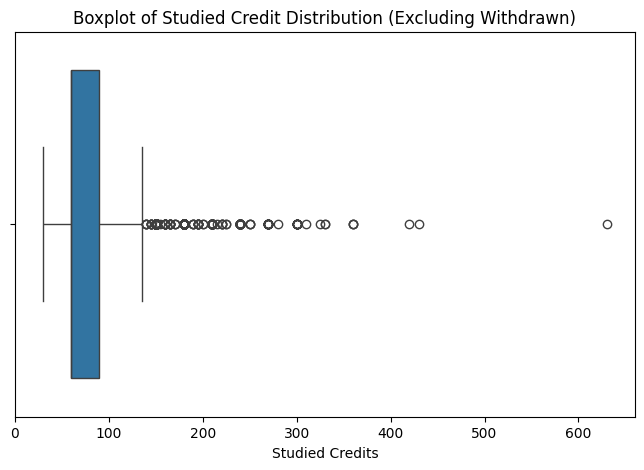

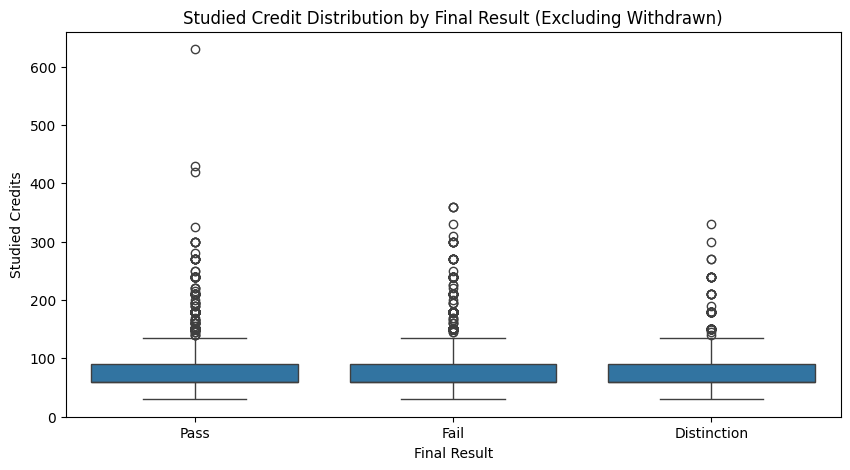

In [79]:

# Check if the studied_credits column exists in df_studentInfo
if 'studied_credits' in df_studentInfo.columns and 'final_result' in df_studentInfo.columns:
    # Filter out withdrawn students
    df_filtered = df_studentInfo[df_studentInfo['final_result'] != 'Withdrawn']

    # Check for missing values in the studied_credits column
    print("Missing values in Studied Credits:", df_filtered['studied_credits'].isnull().sum())

    # Basic statistics for Studied Credits
    print(df_filtered['studied_credits'].describe())

    # Distribution plot of Studied Credits
    plt.figure(figsize=(10, 5))
    sns.histplot(df_filtered['studied_credits'], bins=20, kde=True)
    plt.xlabel("Studied Credits")
    plt.ylabel("Frequency")
    plt.title("Distribution of Studied Credits (Excluding Withdrawn)")
    plt.show()

    # Boxplot to detect outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_filtered['studied_credits'])
    plt.xlabel("Studied Credits")
    plt.title("Boxplot of Studied Credit Distribution (Excluding Withdrawn)")
    plt.show()

    # Checking Studied Credit Distribution by Final Result (without Withdrawn)
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_filtered['final_result'], y=df_filtered['studied_credits'])
    plt.xlabel("Final Result")
    plt.ylabel("Studied Credits")
    plt.title("Studied Credit Distribution by Final Result (Excluding Withdrawn)")
    plt.show()

else:
    print("Column 'studied_credits' or 'final_result' not found in df_studentInfo")


Additional Feature: Assessment Completion Ratio
This feature measures how many assessments a student attempted vs. the total assessments available in a course.

   id_student code_module code_presentation  num_assessments_attempted  \
0       23629         BBB             2013B                        4.0   
1       25107         BBB             2013B                       11.0   
2       29144         BBB             2013B                        9.0   
3       31663         BBB             2013B                       11.0   
4       34229         BBB             2013B                        9.0   

   total_assessments  assessment_completion_ratio  
0                 12                     0.333333  
1                 12                     0.916667  
2                 12                     0.750000  
3                 12                     0.916667  
4                 12                     0.750000  


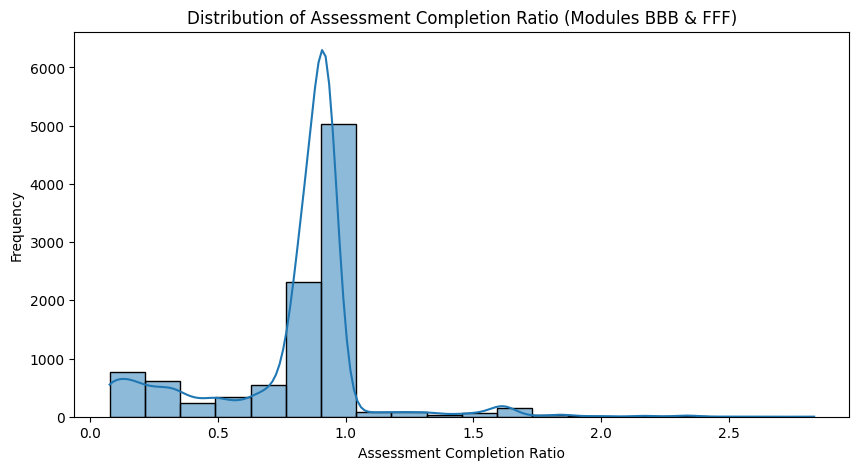

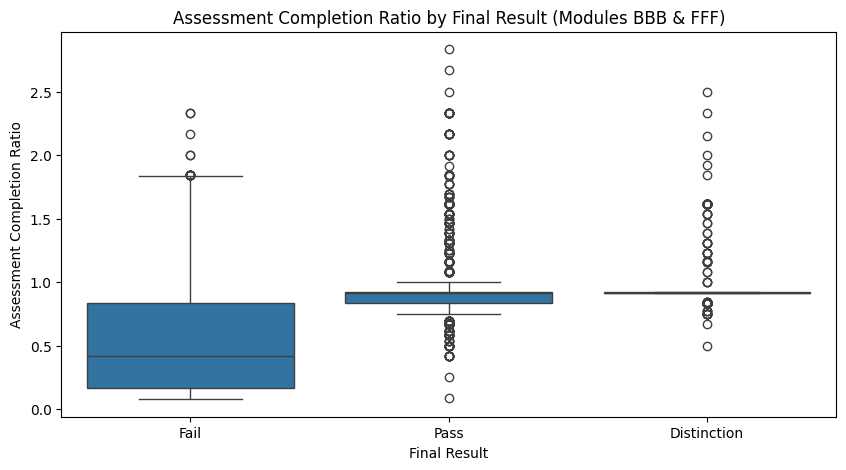

In [80]:
# Filter out withdrawn students and only include modules 'BBB' and 'FFF'
df_filtered_acr = df_studentInfo[
    (df_studentInfo['final_result'] != 'Withdrawn') & 
    (df_studentInfo['code_module'].isin(['BBB', 'FFF']))
].copy()

# A) Count total assessments per course (module & presentation)
df_course_assess_count = df_assessments.groupby(['code_module', 'code_presentation'])['id_assessment'].count().reset_index()
df_course_assess_count.rename(columns={'id_assessment': 'total_assessments'}, inplace=True)

# B) Count how many assessments each student attempted
df_assessment_count = df_studentAssessment.groupby('id_student')['id_assessment'].count().reset_index()
df_assessment_count.rename(columns={'id_assessment': 'num_assessments_attempted'}, inplace=True)

# C) Merge total assessments into the filtered DataFrame
df_filtered_acr = df_filtered_acr.merge(
    df_course_assess_count, 
    on=['code_module', 'code_presentation'], 
    how='left'
)

# D) Merge number of assessments attempted into the filtered DataFrame
df_filtered_acr = df_filtered_acr.merge(df_assessment_count, on='id_student', how='left')

# E) Create the assessment completion ratio feature
df_filtered_acr['assessment_completion_ratio'] = (
    df_filtered_acr['num_assessments_attempted'] / df_filtered_acr['total_assessments']
)

# Display a sample of the results
print(df_filtered_acr[['id_student', 'code_module', 'code_presentation', 
                         'num_assessments_attempted', 'total_assessments', 
                         'assessment_completion_ratio']].head())

# Visualize the distribution of the ratio
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered_acr['assessment_completion_ratio'], bins=20, kde=True)
plt.xlabel("Assessment Completion Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Assessment Completion Ratio (Modules BBB & FFF)")
plt.show()

# Boxplot by final result (if needed)
plt.figure(figsize=(10, 5))
sns.boxplot(x='final_result', y='assessment_completion_ratio', data=df_filtered_acr)
plt.xlabel("Final Result")
plt.ylabel("Assessment Completion Ratio")
plt.title("Assessment Completion Ratio by Final Result (Modules BBB & FFF)")
plt.show()

Feature: Total VLE Clicks
This feature measures a student’s overall engagement in the virtual learning environment by noramlising value by no of credits of that module.

   id_student code_module  studied_credits  total_vle_clicks  \
0       23629         BBB               60             161.0   
1       25107         BBB              120            2562.0   
2       29144         BBB              120            1914.0   
3       31663         BBB               60            5906.0   
4       34229         BBB              120             706.0   

   vle_clicks_per_credit  
0               2.683333  
1              21.350000  
2              15.950000  
3              98.433333  
4               5.883333  


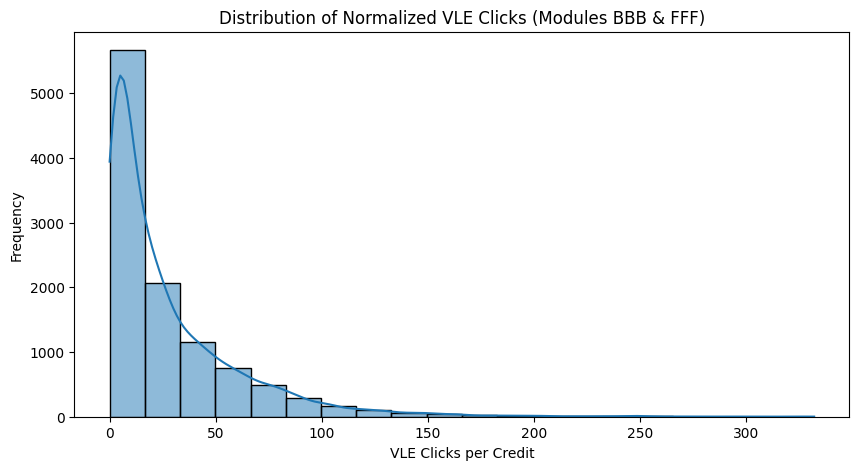

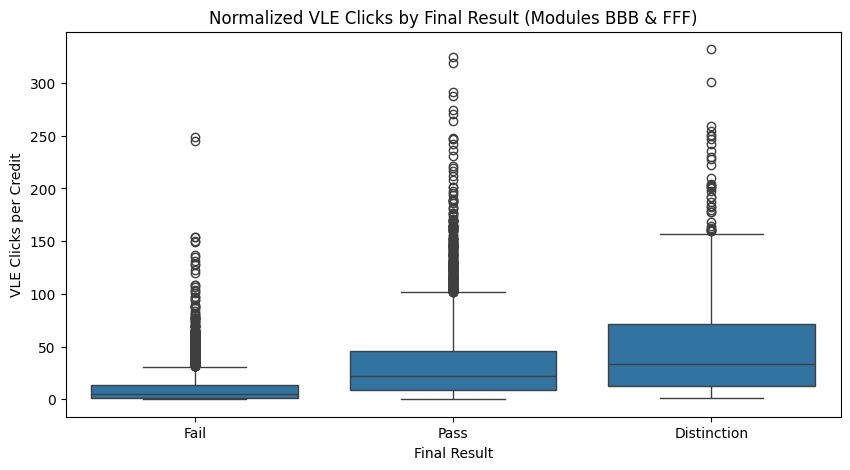

In [81]:
# Filter out withdrawn students and only include modules 'BBB' and 'FFF'
df_filtered_vle = df_studentInfo[
    (df_studentInfo['final_result'] != 'Withdrawn') & 
    (df_studentInfo['code_module'].isin(['BBB', 'FFF']))
].copy()

# Sum total VLE clicks per student
df_vle_clicks = df_studentVle.groupby('id_student')['sum_click'].sum().reset_index()
df_vle_clicks.rename(columns={'sum_click': 'total_vle_clicks'}, inplace=True)

# Merge total VLE clicks into the filtered student info
df_filtered_vle = df_filtered_vle.merge(df_vle_clicks, on='id_student', how='left')

# Fill missing total_vle_clicks with 0 (if no VLE activity was recorded)
df_filtered_vle['total_vle_clicks'] = df_filtered_vle['total_vle_clicks'].fillna(0)

# Compute normalized clicks per credit (if studied_credits is available)
# Be sure studied_credits is not zero to avoid division errors.
df_filtered_vle['vle_clicks_per_credit'] = df_filtered_vle.apply(
    lambda row: row['total_vle_clicks'] / row['studied_credits'] 
    if row['studied_credits'] and row['studied_credits'] != 0 else 0, axis=1
)

# Display a sample of the results
print(df_filtered_vle[['id_student', 'code_module', 'studied_credits', 
                         'total_vle_clicks', 'vle_clicks_per_credit']].head())

# Visualize the distribution of normalized VLE clicks
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered_vle['vle_clicks_per_credit'], bins=20, kde=True)
plt.xlabel("VLE Clicks per Credit")
plt.ylabel("Frequency")
plt.title("Distribution of Normalized VLE Clicks (Modules BBB & FFF)")
plt.show()

# Boxplot by final result (if needed)
plt.figure(figsize=(10, 5))
sns.boxplot(x='final_result', y='vle_clicks_per_credit', data=df_filtered_vle)
plt.xlabel("Final Result")
plt.ylabel("VLE Clicks per Credit")
plt.title("Normalized VLE Clicks by Final Result (Modules BBB & FFF)")
plt.show()


In [82]:
df_studentInfo.info()
# # df_assessments.info()
# df_studentAssessment.info()
# df_studentVle.info()
# df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [85]:
print(df_vle.columns)


Index(['code_module', 'code_presentation', 'id_student', 'id_site', 'date',
       'sum_click'],
      dtype='object')


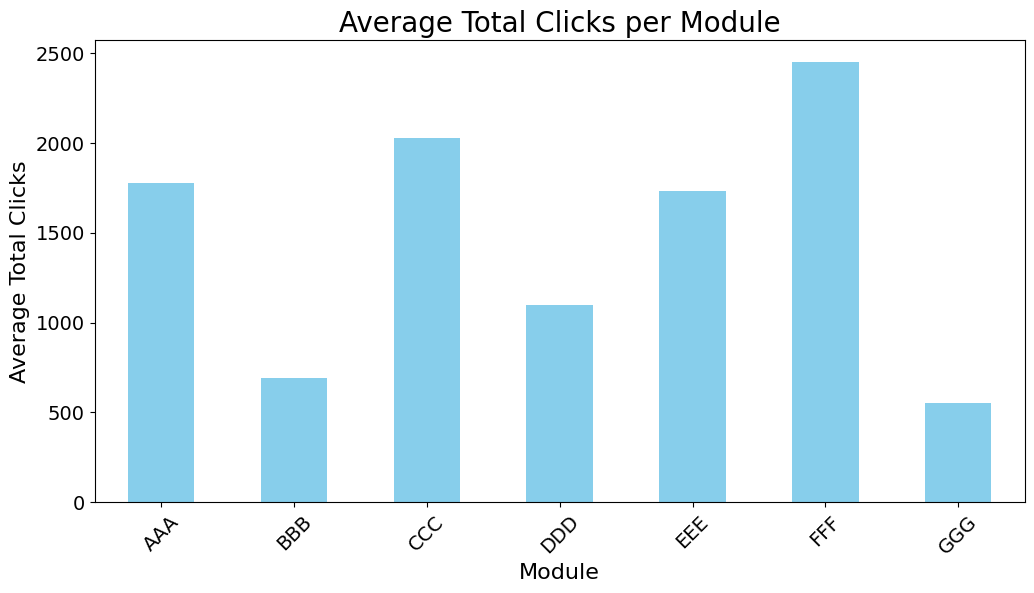

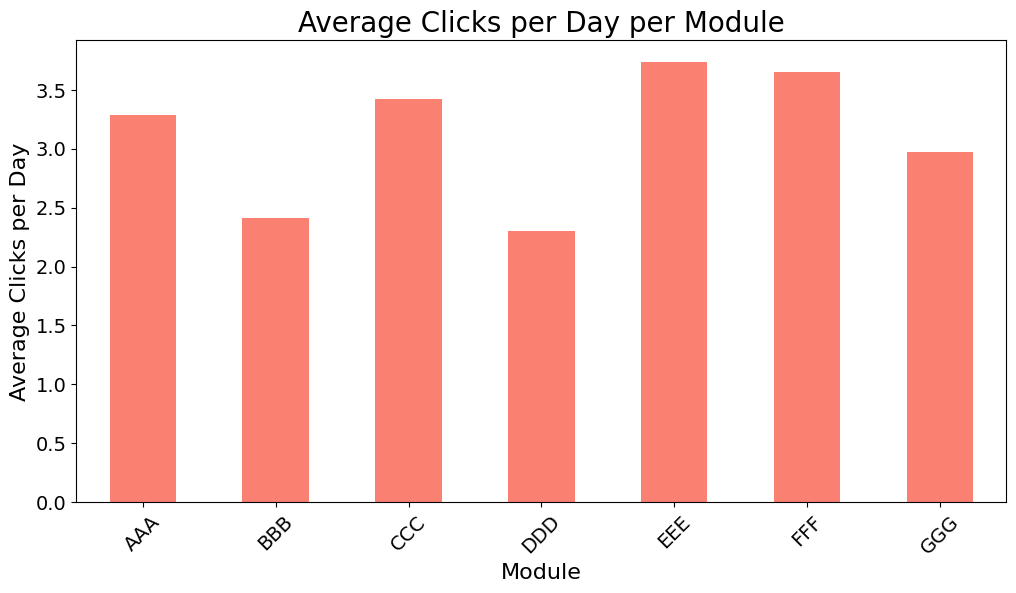

In [ ]:
df_studentInfo = pd.read_csv('studentInfo.csv')  # Load your student info dataset
df_vle = pd.read_csv('studentVle.csv')  # Load your student activity logs dataset

# 1. Extract features: Total clicks and average clicks per day per student
# Total number of clicks per student
df_total_clicks = df_vle.groupby('id_student')['sum_click'].sum().reset_index()
df_total_clicks.columns = ['id_student', 'total_clicks']

# Average clicks per day
df_avg_clicks = df_vle.groupby('id_student')['sum_click'].mean().reset_index()
df_avg_clicks.columns = ['id_student', 'avg_clicks_per_day']

# Merge these extracted features with the main student dataframe (df_studentInfo)
df_studentInfo = pd.merge(df_studentInfo, df_total_clicks, on='id_student', how='left')
df_studentInfo = pd.merge(df_studentInfo, df_avg_clicks, on='id_student', how='left')

# Replace NaN values with 0 for students who have no recorded clicks
df_studentInfo[['total_clicks', 'avg_clicks_per_day']] = df_studentInfo[['total_clicks', 'avg_clicks_per_day']].fillna(0)

# 2. Visualize the extracted features

# Plot total clicks for each module
plt.figure(figsize=(12, 6))
module_clicks = df_studentInfo.groupby('code_module')['total_clicks'].mean()
module_clicks.plot(kind='bar', color='skyblue')

# Increase font sizes for better visibility
plt.title('Average Total Clicks per Module', fontsize=20)
plt.xlabel('Module', fontsize=16)
plt.ylabel('Average Total Clicks', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plot average clicks per day for each module
plt.figure(figsize=(12, 6))
module_avg_clicks = df_studentInfo.groupby('code_module')['avg_clicks_per_day'].mean()
module_avg_clicks.plot(kind='bar', color='salmon')

# Increase font sizes for better visibility
plt.title('Average Clicks per Day per Module', fontsize=20)
plt.xlabel('Module', fontsize=16)
plt.ylabel('Average Clicks per Day', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()
